In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('EDA_census.xlsx')
data.shape

(3132, 15)

#### Q1) What percentage of females in the age group 20-24 are illiterate in India, i.e. out of all the females in the age group 20-24, what fraction is illiterate?

In [3]:
filter_data = data[(data['Age-group'] == '20-24') & (data['Category'] == 'Total') & (data['Area Name'] == 'INDIA')]
(filter_data['Illiterate Females'] / filter_data['Total Females']) * 100

15    22.683085
dtype: float64

#### Q2) Compare the literacy rates (i.e. the number of literates / total number of population) in each age group and choose the correct option.

In [4]:
X = data.groupby(by = 'Age-group')[['Total Persons', 'Literate Persons']].sum()

In [5]:
X['Literacy Rate'] = (X['Literate Persons'] / X['Total Persons'])*100

In [6]:
X.head()

,Total Persons,Literate Persons,Literacy Rate
Age-group,,,
7,99306560,72313704,72.818658
8,107873492,91347836,84.680522
9,93698552,83730936,89.362038
10,122208428,108390408,88.693071
11,98963784,91009892,91.962826


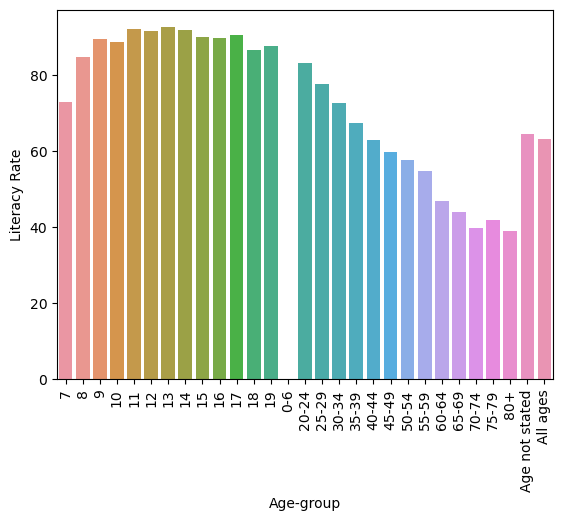

In [7]:
sns.barplot(x = X.index, y = X['Literacy Rate'])
plt.xticks(rotation=90)
plt.show()

#### Q3) Which state shows the highest female literacy rate?

In [8]:
data_by_total_category = data[data['Category'] == 'Total']
data_by_total_category['Area Name'] = data_by_total_category['Area Name'].apply(lambda x: x.replace('State - ', ''))

C:\Users\vimishra\AppData\Local\Temp\ipykernel_23936\4132775792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_total_category['Area Name'] = data_by_total_category['Area Name'].apply(lambda x: x.replace('State - ', ''))


In [9]:
X = data_by_total_category.groupby(by = 'Area Name')[['Total Females', 'Literate Females']].sum()

In [10]:
X['Literacy Rate'] = (X['Literate Females'] / X['Total Females'])*100

In [11]:
X.head()

,Total Females,Literate Females,Literacy Rate
Area Name,,,
ANDAMAN & NICOBAR ISLANDS,355420,259808,73.098869
ANDHRA PRADESH,84277262,44611034,52.933654
ARUNACHAL PRADESH,1339630,652274,48.690609
ASSAM,30532266,17218676,56.395015
BIHAR,99642590,41793060,41.942968


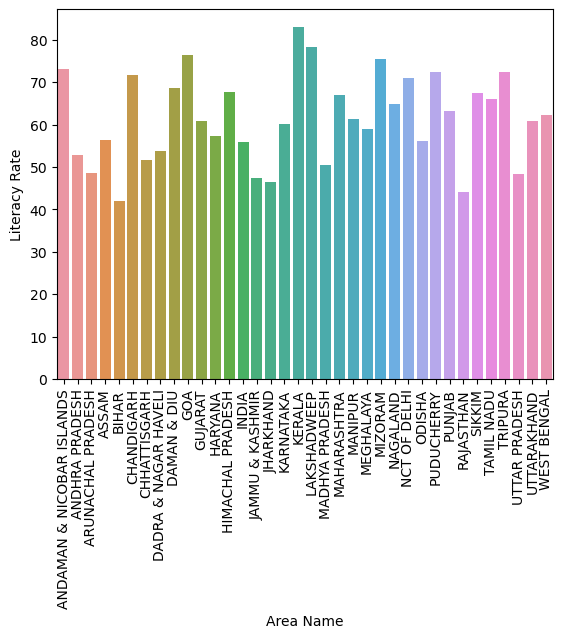

In [12]:
sns.barplot(x = X.index, y = X['Literacy Rate'])
plt.xticks(rotation=90)
plt.show()

In [13]:
X[X['Literacy Rate'] == X['Literacy Rate'].max()]

,Total Females,Literate Females,Literacy Rate
Area Name,,,
KERALA,34757298,28861842,83.038221


#### Q4) Across all the states, which state shows the lowest literacy rate in 2011 (total population)?

In [14]:
X = data_by_total_category.groupby(by = 'Area Name')[['Total Persons', 'Literate Persons']].sum()
X['Literacy Rate'] = (X['Literate Persons'] / X['Total Persons'])*100
X.head()

,Total Persons,Literate Persons,Literacy Rate
Area Name,,,
ANDAMAN & NICOBAR ISLANDS,761162,588562,77.324144
ANDHRA PRADESH,169161554,101113520,59.773345
ARUNACHAL PRADESH,2767454,1532010,55.358102
ASSAM,62411152,38355954,61.456892
BIHAR,208198904,105009106,50.436916


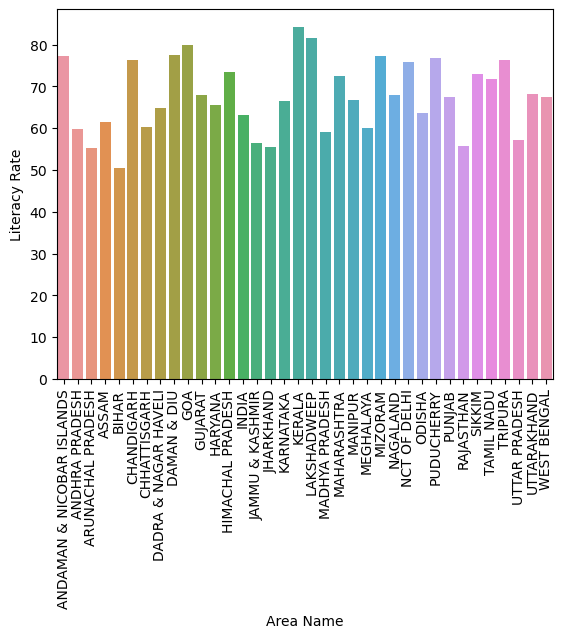

In [15]:
sns.barplot(x = X.index, y = X['Literacy Rate'])
plt.xticks(rotation=90)
plt.show()

In [16]:
X[X['Literacy Rate'] == X['Literacy Rate'].min()]

,Total Persons,Literate Persons,Literacy Rate
Area Name,,,
BIHAR,208198904,105009106,50.436916
